In [97]:
# pip install yfinance

In [98]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [99]:
jpy_usd = yf.download(developed_cur, period = '1y')

[*********************100%%**********************]  7 of 7 completed


In [112]:
## list the currencies

# developed_cur = ["JPYUSD=X","JPYCAD=X","JPYCHF=X","JPYEUR=X","JPYAUD=X","JPYGBP=X"] #"JPYSGD=X",
# em_cur =        ["JPYTHB=X","JPYKRW=X","JPYINR=X","JPYSAR=X","JPYZAR=X","JPYBRL=X","JPYBRL=X"] #"JPYVND=X","JPYPHP=X","JPYEGP=X","JPYMNX=X"
developed_cur  = ["USDTHB=X","CADTHB=X","JPYTHB=X","CHFTHB=X","EURTHB=X","AUDTHB=X","GBPTHB=X"]
em_cur =        ["KRWTHB=X","INRTHB=X","ZARTHB=X"] 

currencies = developed_cur + em_cur

In [113]:
data

Price       Adj Close                                                       \
Ticker       AUDTHB=X   CADTHB=X   CHFTHB=X CNYTHB=X   EURTHB=X   GBPTHB=X   
Date                                                                         
2023-08-08  22.875662  26.028179  39.869858      NaN  38.294998  44.504799   
2023-08-09  22.857925  26.060009  39.959358      NaN  38.346001  44.612099   
2023-08-10  22.905231  26.118450  39.962605      NaN  38.473000  44.596901   
2023-08-11  22.863922  26.107100  40.027416      NaN  38.543999  44.493401   
2023-08-14  22.412842  25.676430  39.364235      NaN  37.769001  44.549198   
...               ...        ...        ...      ...        ...        ...   
2024-08-02  23.083685  25.606829  40.719833      NaN  38.341999  45.249840   
2024-08-05  22.312080  24.734278  40.106621      NaN  37.466000  44.088020   
2024-08-06  23.105709  25.691029  41.488312      NaN  38.837002  45.352577   
2024-08-07  23.097698  25.720060  41.583172      NaN  38.742001  44.981888   
2024-08-08  23.253000  25.899000  41.312000   4.9549  38.827000  45.125999   

Price                                                ...   Volume           \
Ticker      INRTHB=X  JPYTHB=X  KRWTHB=X   USDTHB=X  ... CADTHB=X CHFTHB=X   
Date                                                 ...                     
2023-08-08  0.420612  0.244202  0.026609  34.820000  ...        0        0   
2023-08-09  0.422583  0.244195  0.026557  35.000000  ...        0        0   
2023-08-10  0.422957  0.243853  0.026671  35.055000  ...        0        0   
2023-08-11  0.423737  0.242283  0.026631  35.119999  ...        0        0   
2023-08-14  0.414652  0.238273  0.025979  35.084999  ...        0        0   
...              ...       ...       ...        ...  ...      ...      ...   
2024-08-02  0.424301  0.238279  0.025959  35.573002  ...        0        0   
2024-08-05  0.413418  0.235902  0.025318  35.279999  ...        0        0   
2024-08-06  0.422196  0.243254  0.025891  35.500000  ...        0        0   
2024-08-07  0.422477  0.245047  0.025929  35.393002  ...        0        0   
2024-08-08  0.423300  0.239900  0.025797  35.549999  ...        0        0   

Price                                                                      \
Ticker     CNYTHB=X EURTHB=X GBPTHB=X INRTHB=X JPYTHB=X KRWTHB=X USDTHB=X   
Date                                                                        
2023-08-08      NaN        0        0        0        0        0        0   
2023-08-09      NaN        0        0        0        0        0        0   
2023-08-10      NaN        0        0        0        0        0        0   
2023-08-11      NaN        0        0        0        0        0        0   
2023-08-14      NaN        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2024-08-02      NaN        0        0        0        0        0        0   
2024-08-05      NaN        0        0        0        0        0        0   
2024-08-06      NaN        0        0        0        0        0        0   
2024-08-07      NaN        0        0        0        0        0        0   
2024-08-08      0.0        0        0        0        0        0        0   

Price                
Ticker     ZARTHB=X  
Date                 
2023-08-08        0  
2023-08-09        0  
2023-08-10        0  
2023-08-11        0  
2023-08-14        0  
...             ...  
2024-08-02        0  
2024-08-05        0  
2024-08-06        0  
2024-08-07        0  
2024-08-08        0  

[262 rows x 66 columns]

In [114]:
## download currenies data
data = yf.download(currencies, period='1y')

# Resampling to monthly frequency + calculating monthly returns
monthly_data = data['Close'].resample('M').last()
monthly_returns = monthly_data.pct_change().dropna()

# Ranking the currencies 
ranked_returns = monthly_returns.rank(axis=1, ascending=False)


[*********************100%%**********************]  10 of 10 completed


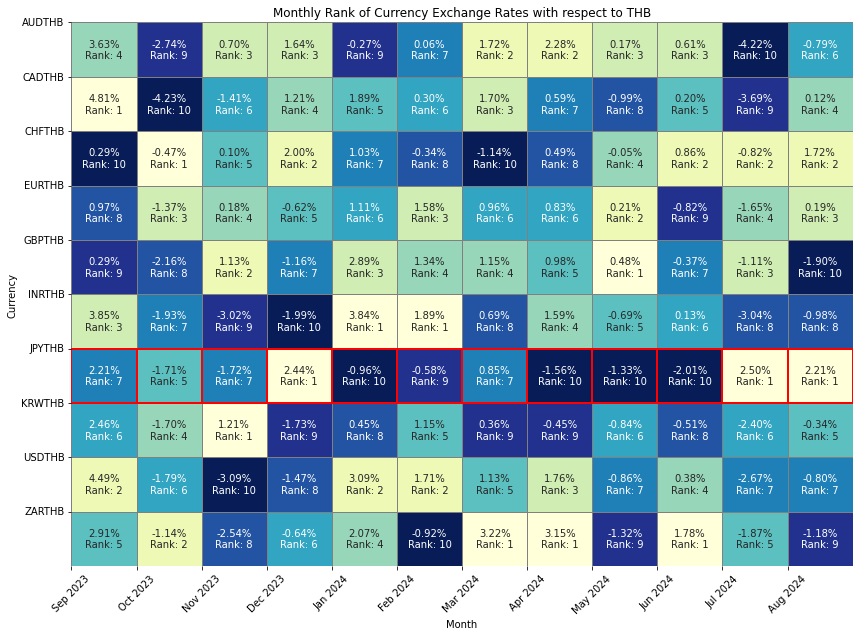

In [129]:
# annotation labels
annot_labels = monthly_returns.applymap(lambda x: f"{x:.2%}") + "\n" + ranked_returns.applymap(lambda x: f"Rank: {int(x)}")

# rank chart
plt.figure(figsize=(14, 10))

# heatmap with custom colors to highlight JPY related boxes
ax = sns.heatmap(ranked_returns.T, annot=annot_labels.T, fmt='', cmap='YlGnBu', cbar=False, linewidths=0.5, linecolor='gray')

# Highlight JPY related boxes
for i in range(len(ranked_returns.index)):
    for j in range(len(monthly_returns.columns)):
        if 'JPY' in monthly_returns.columns[j]:
            ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=False, edgecolor='red', lw=2))

plt.title('Monthly Rank of Currency Exchange Rates with respect to THB')
plt.xlabel('Month')
plt.ylabel('Currency')
plt.xticks(ticks=range(len(ranked_returns.index)), labels=[date.strftime('%b %Y') for date in ranked_returns.index] , rotation=45)
plt.yticks(ticks=range(len(monthly_returns.columns)), labels=[currency.replace('=X', '') for currency in monthly_returns.columns], rotation=0, va='center')

plt.show()